# Assignment 1 Biological Data


# Part 1

## Question 1 - DNA sequence translation

Test all possible frames (3 shifts x 2 forward/complement x 2 directions) as the sequence could be a fragment, complement, or inversion of a gene.


In [1]:
# Load the libraries
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Align import substitution_matrices
from Bio.Blast import NCBIXML
import pandas as pd
from Bio import pairwise2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import AlignIO
from collections import Counter

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# DNA sequence
dna_sequence = "CAGCCGTGGTTTCACGGCCCCCTGAGCCGAGCAGAGGCCGAGAACCTTCTGTCCCTCTGCAAGGAAGGCAGCTACCTCGTTCGGCTCAGCGAGACCAGGGCTCAGGACTGCATTCTGTCTCTCAGAAGCAACCAGGGTTCCATGCACCTGAAATTCGCAAGGACCCGGGAGAACCAGGTGGTACTGGGACAGCACAGTGGGCCCTTCCCCAGCATACCTGAGCTGGTCCTGCATTACAGTGCCCGCCCACTGCCCGTGCAAGGGGCAGAGCACCTGGCCCTGCTCTATCCT"

In [3]:
def translate_all_frames(dna_sequence):
    # Convert to Seq object
    seq = Seq(dna_sequence)
    results = []
    print("Sequence Length : {}".format(len(seq)))

    # Original sequence, left to right
    print("\nOriginal sequence (left to right)")
    for i in range(3):
        frame = seq[i:]
        protein = frame.translate()
        print(f"Frame {i+1}: {protein}")
        results.append(protein)

    # Original sequence, right to left
    print("\nOriginal sequence (right to left)")
    reversed_seq = seq[::-1]
    for i in range(3):
        frame = reversed_seq[i:]
        protein = frame.translate()
        print(f"Frame {i+1}: {protein}")
        results.append(protein)

    # Complement sequence, left to right
    print("\nComplement sequence (left to right)")
    complement_seq = seq.complement()
    for i in range(3):
        frame = complement_seq[i:]
        protein = frame.translate()
        print(f"Frame {i+1}: {protein}")
        results.append(protein)

    # Complement sequence, right to left
    print("\nComplement sequence (right to left)")
    reversed_complement = seq.reverse_complement()
    for i in range(3):
        frame = reversed_complement[i:]
        protein = frame.translate()
        print(f"Frame {i+1}: {protein}")
        results.append(protein)

    return results


In [4]:
# Translate all frames
translations = translate_all_frames(dna_sequence)

Sequence Length : 291

Original sequence (left to right)
Frame 1: QPWFHGPLSRAEAENLLSLCKEGSYLVRLSETRAQDCILSLRSNQGSMHLKFARTRENQVVLGQHSGPFPSIPELVLHYSARPLPVQGAEHLALLYP
Frame 2: SRGFTAP*AEQRPRTFCPSARKAATSFGSARPGLRTAFCLSEATRVPCT*NSQGPGRTRWYWDSTVGPSPAYLSWSCITVPAHCPCKGQSTWPCSI
Frame 3: AVVSRPPEPSRGREPSVPLQGRQLPRSAQRDQGSGLHSVSQKQPGFHAPEIRKDPGEPGGTGTAQWALPQHT*AGPALQCPPTARARGRAPGPALS

Original sequence (right to left)
Frame 1: SYLVPVHETGNVPVTRP*HYVLVESIRPLPG*HDRVMVDQEGPGTLKVHVPWDQRRLSVLRQDSGPERLGLLHRRKERLPVFQEPETSRVPRHFGAD
Frame 2: PISSRSTRRGTCPSPARDITSWSSPYDPFPGDTTGSWWTKRAQERLKSTYLGTNEDSLSYVRTRDQSDSACSIDGRNVSLSSKSRRRAESPGTLVP
Frame 3: LSRPGPRDGERARHPPVTLRPGRVHTTPSRVTRQGHGGPRGPRNA*SPRTLGPTKTLCLTSGLGTRATRLAPSTEGTSPCLPRAGDEPSPPALWCR

Complement sequence (left to right)
Frame 1: VGTKVPGDSARLRLLEDRETFLPSMEQAESLWSRVLT*DRESSLVPRYVDFKRSWALLVHHDPVVSPGKGSYGLDQDVMSRAGDGHVPRLVDRDEIG
Frame 2: SAPKCRGTRLVSGSWKTGRRSFRRWSKPSRSGPES*RKTESLRWSQGTWTLSVPGPSWSTMTLSCHPGRGRMDSTRT*CHGRVTGTFPVSWTGTR*
Frame 3: RHQSAGGLGSS

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


The correct translation of the sequence looks like to be the frame 1 of the original sequence from left to right because the other ones contain multiple stop codons, which indicate incomplete or fragmented proteins in these frames.

**Correct translation:**
`QPWFHGPLSRAEAENLLSLCKEGSYLVRLSETRAQDCILSLRSNQGSMHLKFARTRENQVVLGQHSGPFPSIPELVLHYSARPLPVQGAEHLALLYP`




## Question 2 - Sequence Alignment BLAST

Align the amino acid sequence against the SwissProt database using the BLAST service.
Hint: If the search against SwissProt does not provide any significant hits, try using a larger database like UniRef50.

![Screenshot 2024-11-11 at 15.24.18.png](<attachment:Screenshot 2024-11-11 at 15.24.18.png>)

![Screenshot 2024-11-11 at 15.24.57.png](<attachment:Screenshot 2024-11-11 at 15.24.57.png>)

1. How many significant hits?

    I found 56 significant hits.
2. What is the coverage of the query sequence (your input) with the best matched sequence?

    The query coverage is 100%, indicating that the sequence aligns across the entire length with the protein.
3. What is the coverage of the best matched sequence with your input sequence?
    
    As we can see in the BLAST results, the best matched sequence has a accession length of 343, our sequence has a length of 97, so the coverage of the best matched sequence with our input sequence is ~ 28%.
4. According to the BLAST results, is your input sequence a fragment or a full protein?

    Given the 28% coverage with a known full-length protein sequence, my input sequence is for sure a fragment rather than a full or nearly complete protein.



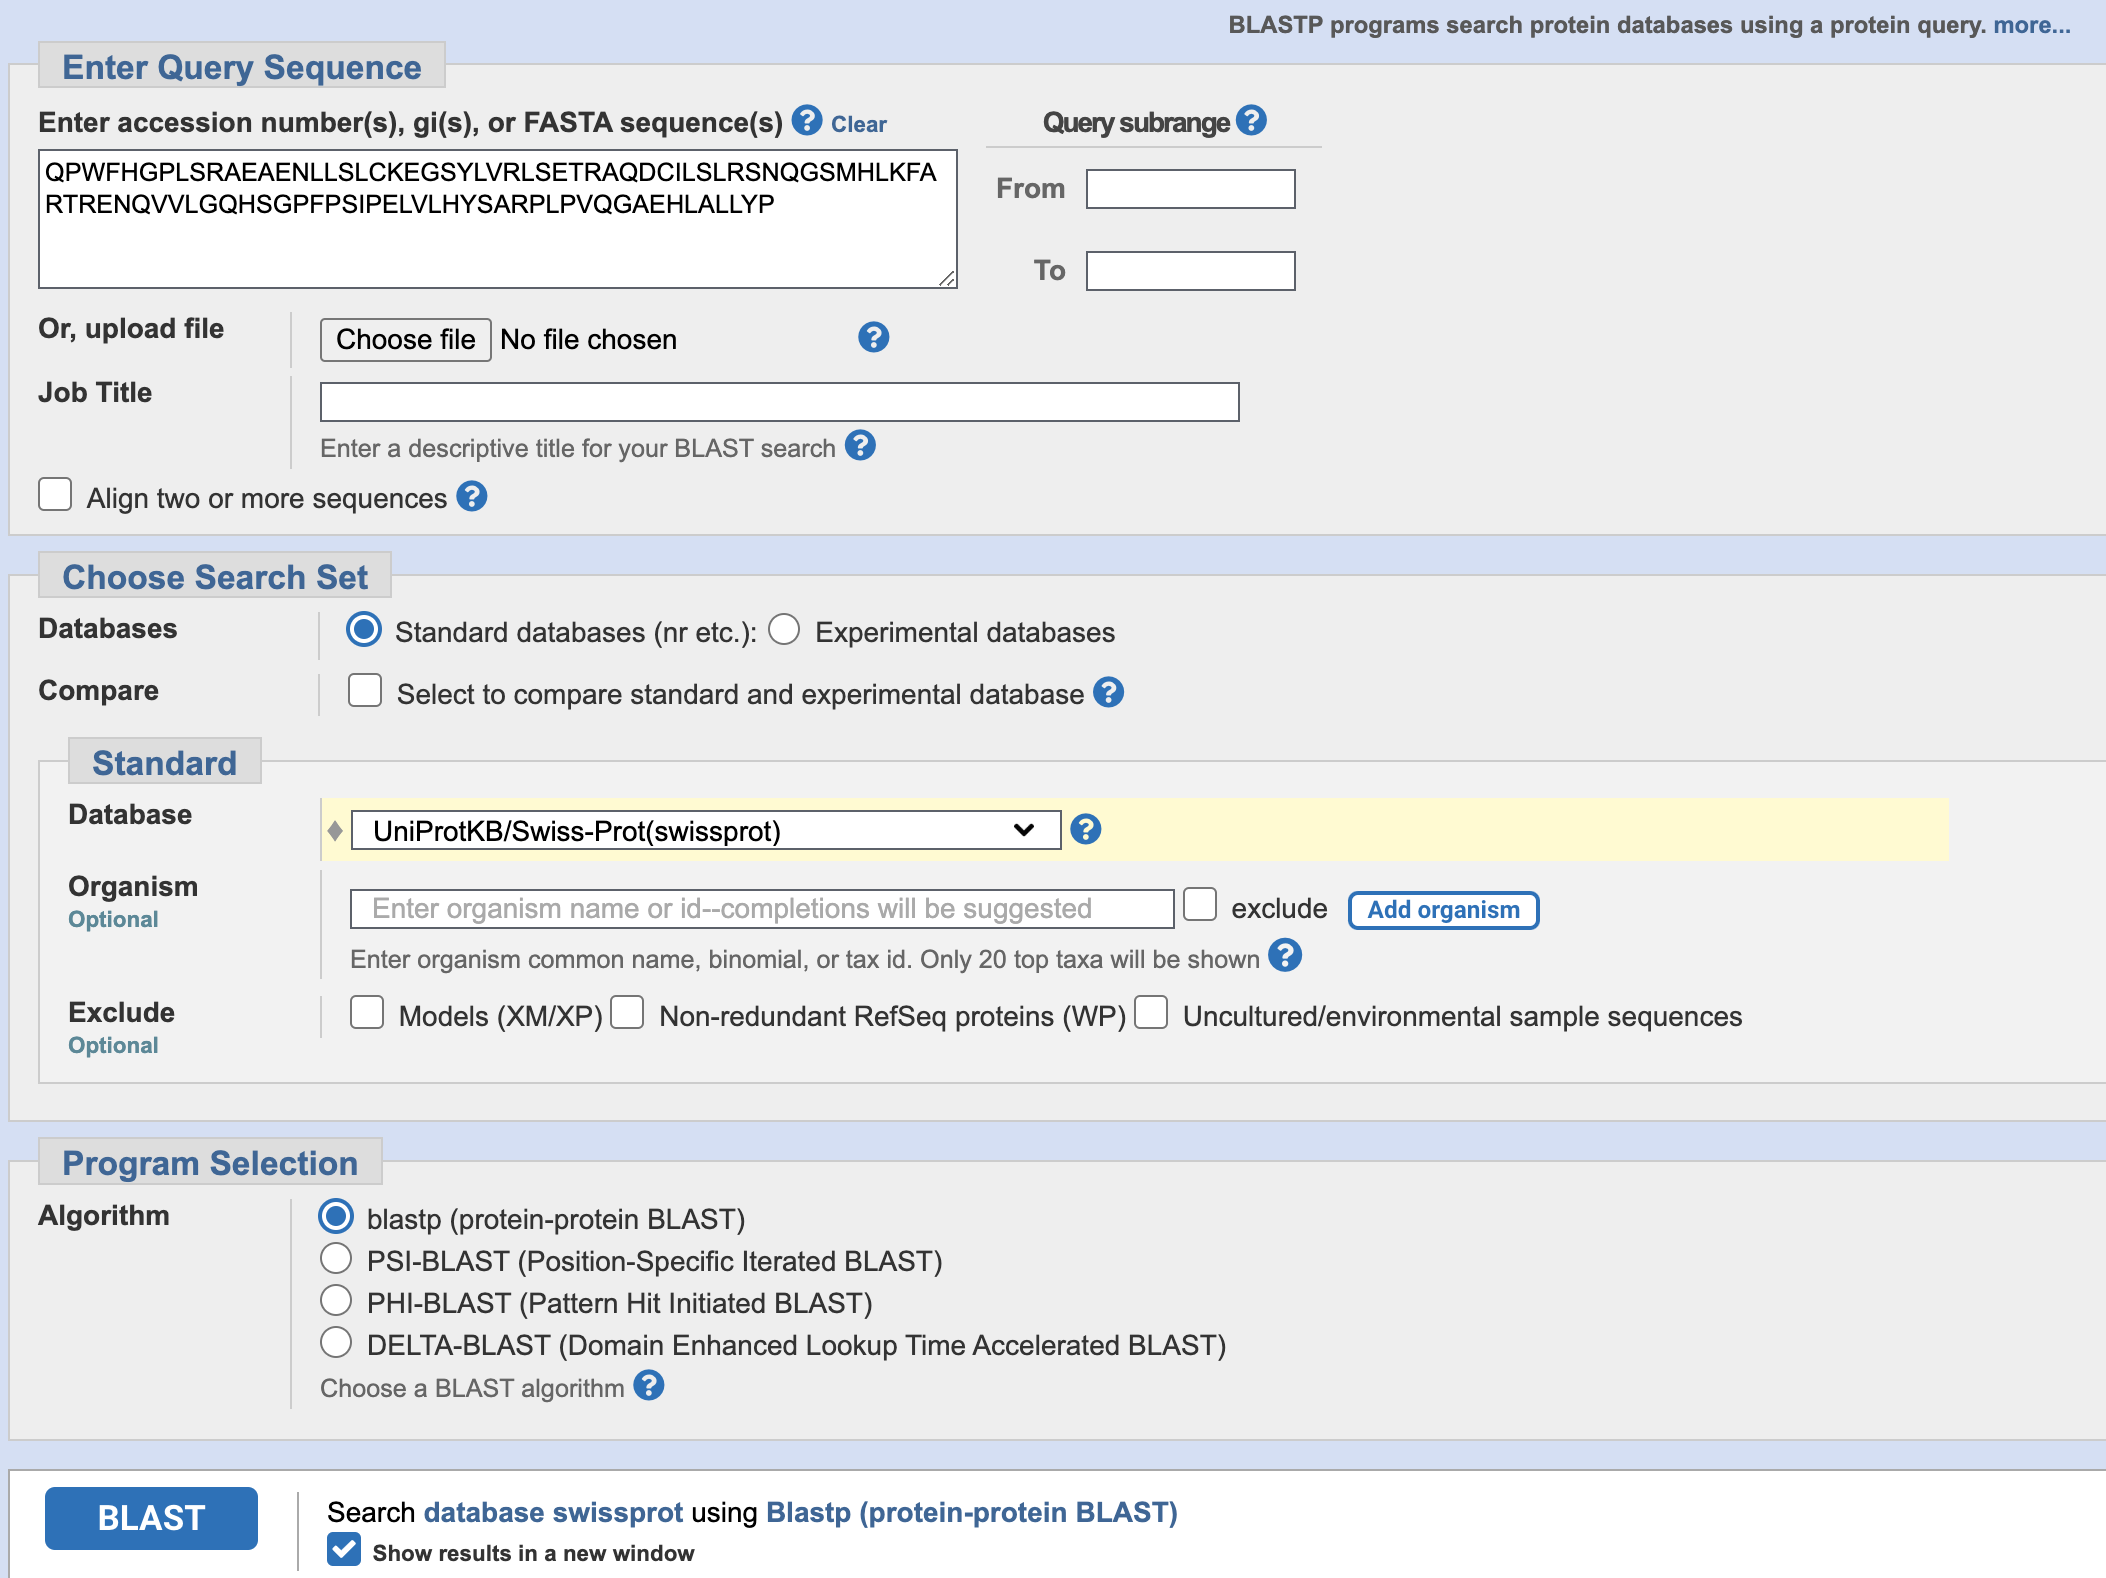
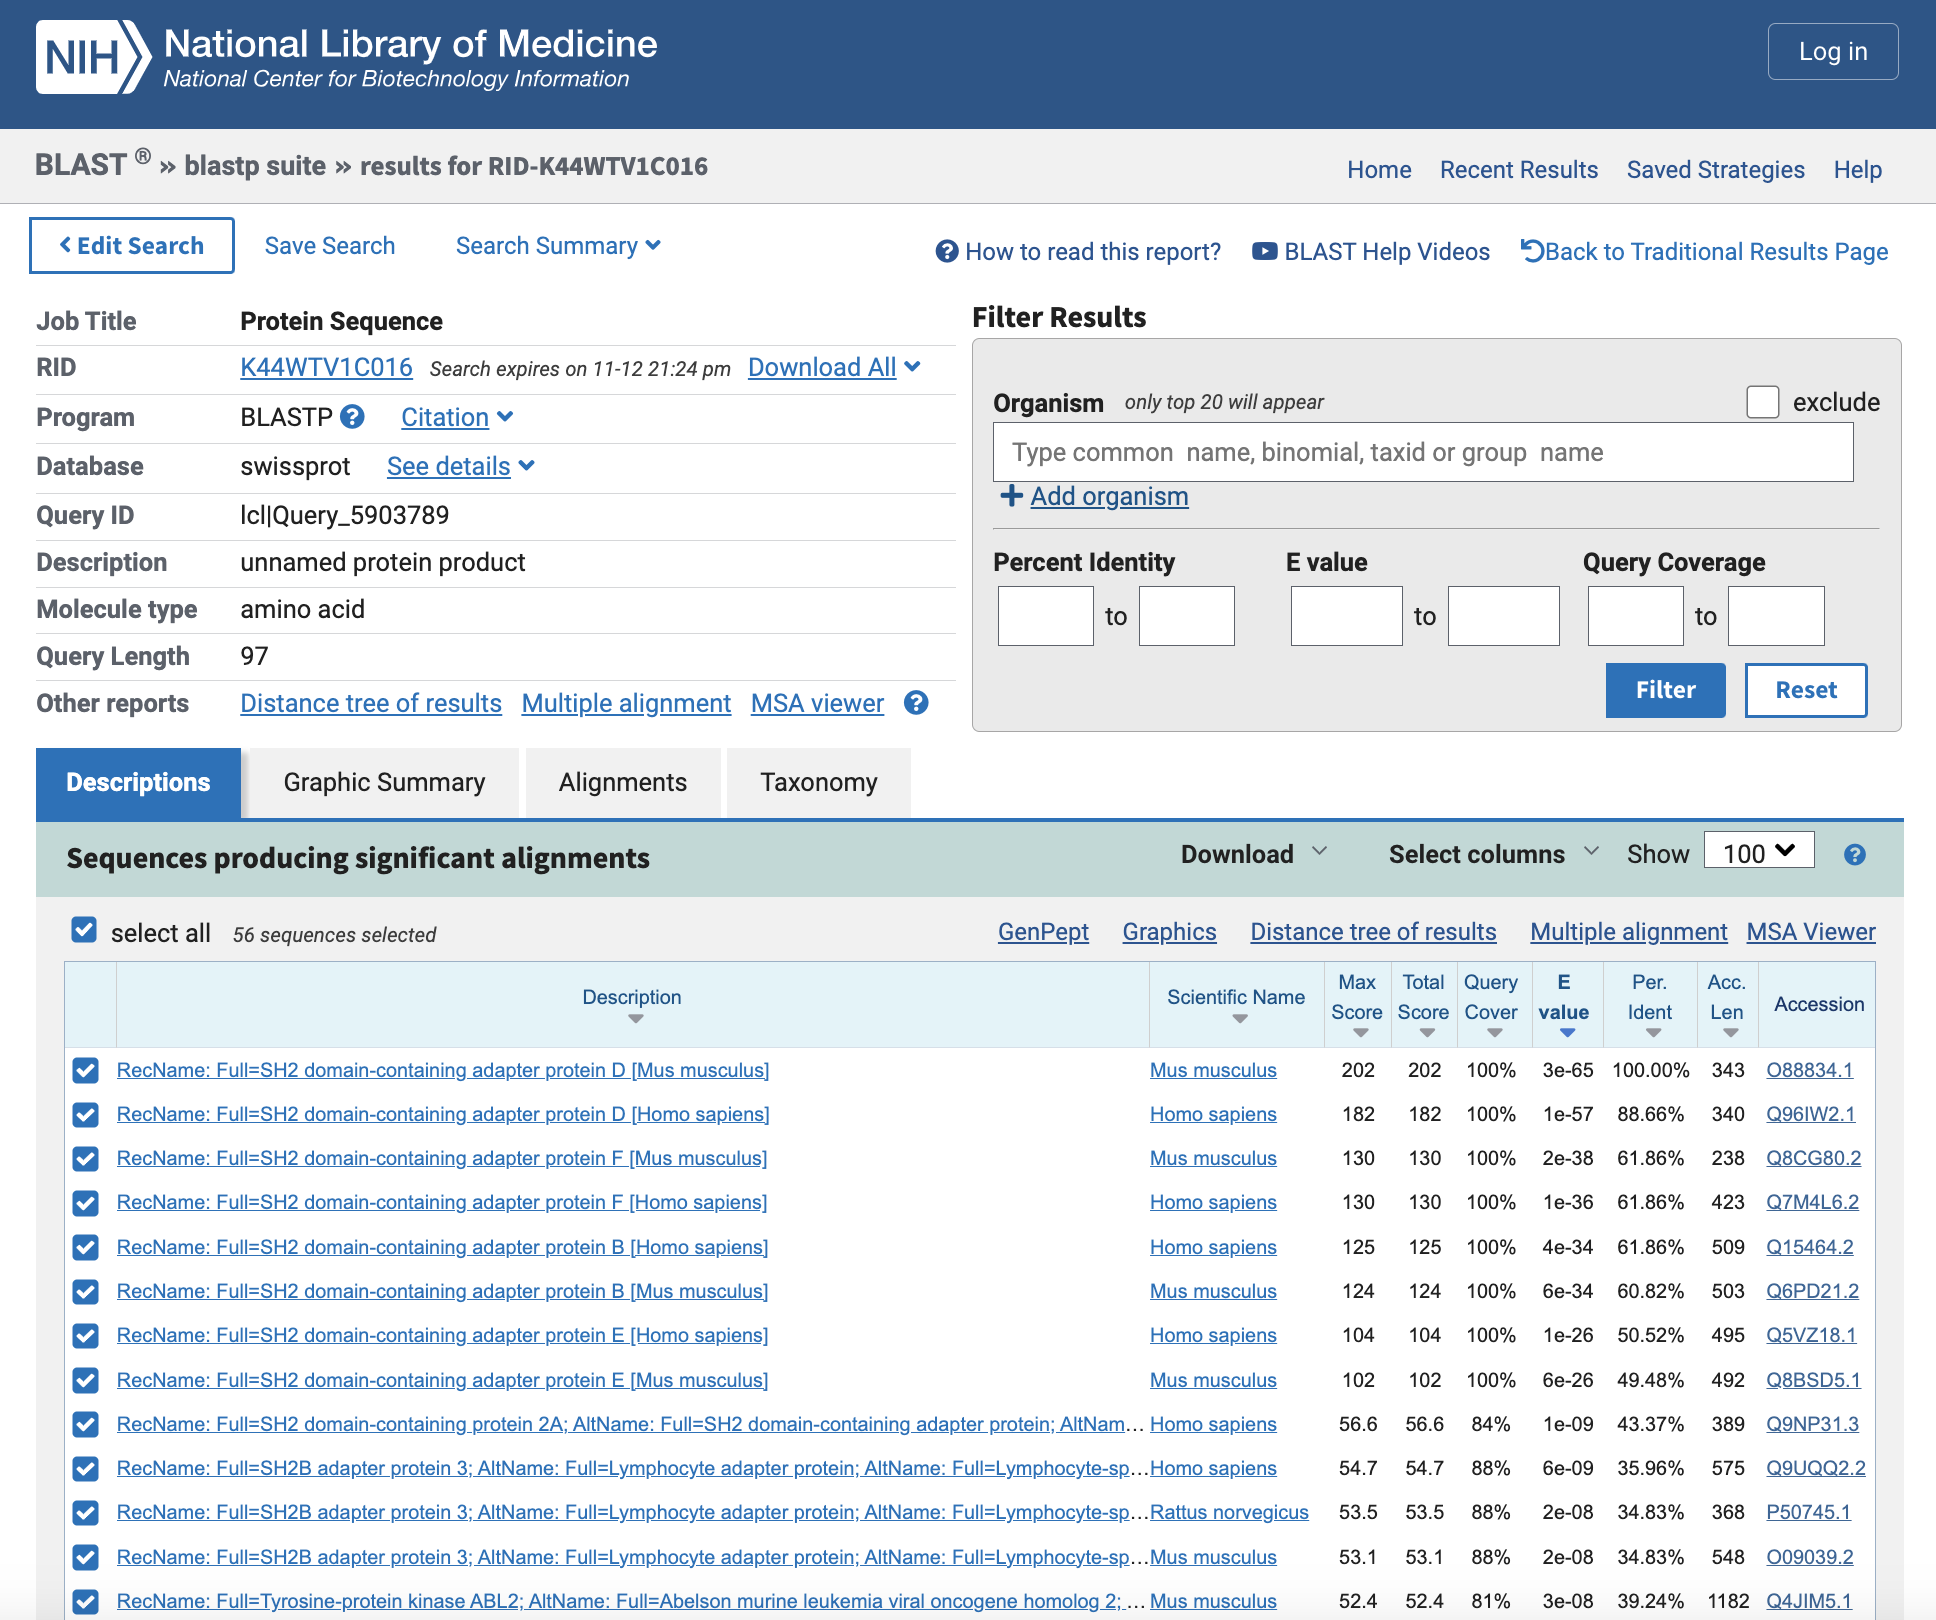

In [5]:
protein_sequence = translations[0]
print("The length of our sequence is: {}".format(len(protein_sequence)))

best_match_len = 343
print("The length of our best matched sequence is: {}".format(best_match_len))

similarity = np.round((len(protein_sequence) / best_match_len) * 100, 2)
print("Our sequence is {}% similar to the best matched sequence".format(similarity))

The length of our sequence is: 97
The length of our best matched sequence is: 343
Our sequence is 28.28% similar to the best matched sequence


## Question 3 - Needleman-Wunsch and Smith-Waterman algorithms.

Compare your amino acid sequence with the best match found in the previous BLAST by using Needleman-Wunsch and Smith-Waterman algorithms.
Hint: You can retrieve the full sequence of a matched protein from UniProtKB using the protein ID or Accession code available in the BLAST output.

1.	Provide identity, number of gaps, similarity, and score for the two alignments generated with the two different algorithms.
    ```
    Needleman-Wunsch Alignment:
    Identity: 97
    Gaps: 246
    Similarity (Score): 367.0

    Smith-Waterman Alignment:
    Identity: 97
    Gaps: 246
    Similarity (Score): 509.0
    ```
2.	Which algorithm gives the best alignment? Why?
    
    The Smith-Waterman algorithm gives the best alignment in this case, as indicated by the higher similarity score that is the only different result obtained. The Smith-Waterman algorithm is a local alignment algorithm, while Needleman-Wunsch algorithm is a global alignment algorithm.

3.	Which algorithm between BLAST and Smith-Waterman gives the best alignment? Why?

    Generally, BLAST provides a quicker approximate alignment, but Smith-Waterman is more precise for identifying the best local alignment. In this case, the Smith-Waterman algorithm gives the best alignment because it is designed to find the best local alignment between two sequences, which is essential for comparing the query sequence with a known protein sequence.

In [6]:
# Define the query and subject sequences
query_sequence = Seq("QPWFHGPLSRAEAENLLSLCKEGSYLVRLSETRAQDCILSLRSNQGSMHLKFARTRENQVVLGQHSGPFPSIPELVLHYSARPLPVQGAEHLALLYP")

# Load the subject sequence from the FASTA file
subject_sequence = None
with open("O88834.fasta") as fasta_file:
    for record in SeqIO.parse(fasta_file, "fasta"):
        subject_sequence = record.seq

# Load the substitution matrix for scoring
blosum62 = substitution_matrices.load('BLOSUM62')

# Perform Needleman-Wunsch (global) alignment
nw_alignments = pairwise2.align.globalds(query_sequence, subject_sequence, blosum62, -10, -0.5)

# Perform Smith-Waterman (local) alignment
sw_alignments = pairwise2.align.localds(query_sequence, subject_sequence, blosum62, -10, -0.5)

# Extract information from the best Needleman-Wunsch alignment
nw_best = nw_alignments[0]
nw_identity = sum(res1 == res2 for res1, res2 in zip(nw_best[0], nw_best[1]))
nw_gaps = nw_best[0].count('-') + nw_best[1].count('-')
nw_similarity = nw_best[2]  # alignment score

# Extract information from the best Smith-Waterman alignment
sw_best = sw_alignments[0]
sw_identity = sum(res1 == res2 for res1, res2 in zip(sw_best[0], sw_best[1]))
sw_gaps = sw_best[0].count('-') + sw_best[1].count('-')
sw_similarity = sw_best[2]  # alignment score

print(f"Needleman-Wunsch Alignment:\nIdentity: {nw_identity}\nGaps: {nw_gaps}\nSimilarity (Score): {nw_similarity}\n")
print(f"Smith-Waterman Alignment:\nIdentity: {sw_identity}\nGaps: {sw_gaps}\nSimilarity (Score): {sw_similarity}\n")


Needleman-Wunsch Alignment:
Identity: 97
Gaps: 246
Similarity (Score): 367.0

Smith-Waterman Alignment:
Identity: 97
Gaps: 246
Similarity (Score): 509.0



## Question 4 - HMMER

Evaluate your amino acid sequence against the Pfam database of HMM models.
Hint: Use the HMMER web services to evaluate HMM models. Use the UniProtKB website  (advanced search) to search Pfam proteins.

![Screenshot 2024-11-06 at 11.36.38.png](<attachment:Screenshot 2024-11-06 at 11.36.38.png>)

1.	Which Pfam domain(s) match your sequence?
    
    The SH2 domain (`Pfam ID: PF00017`) matches the sequence.
2.	Is your sequence fully covered by Pfam domains?
    
    Our sequence has a length of 97 amino acids, the coverage with the SH2 domain is from 3 to 79 so it is partially covered.
3.	How many proteins in SwissProt have the same domain? (Consider only one Pfam ID if your protein is multi-domain.)
    
    401
    
    `(xref:pfam-PF00017) AND (reviewed:true)`

    
    
![Screenshot 2024-11-11 at 15.48.56.png](<attachment:Screenshot 2024-11-11 at 15.48.56.png>)
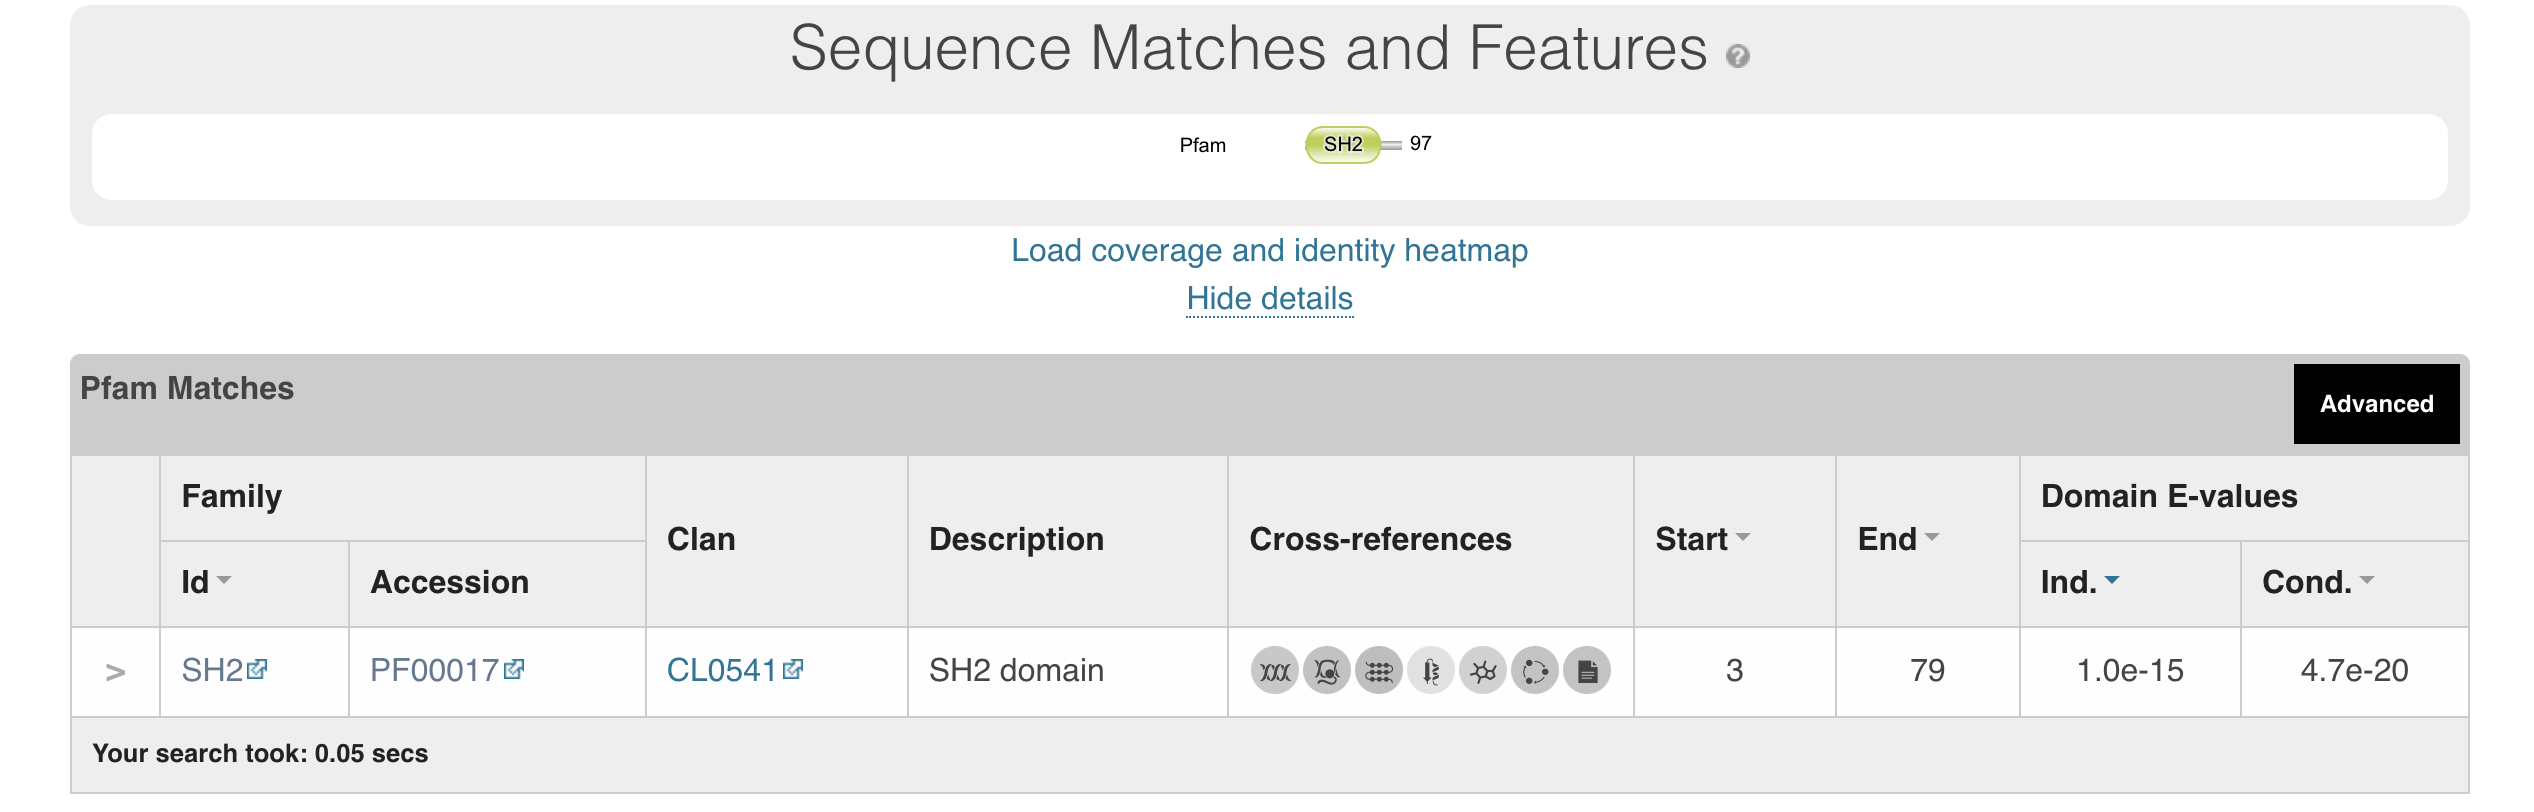
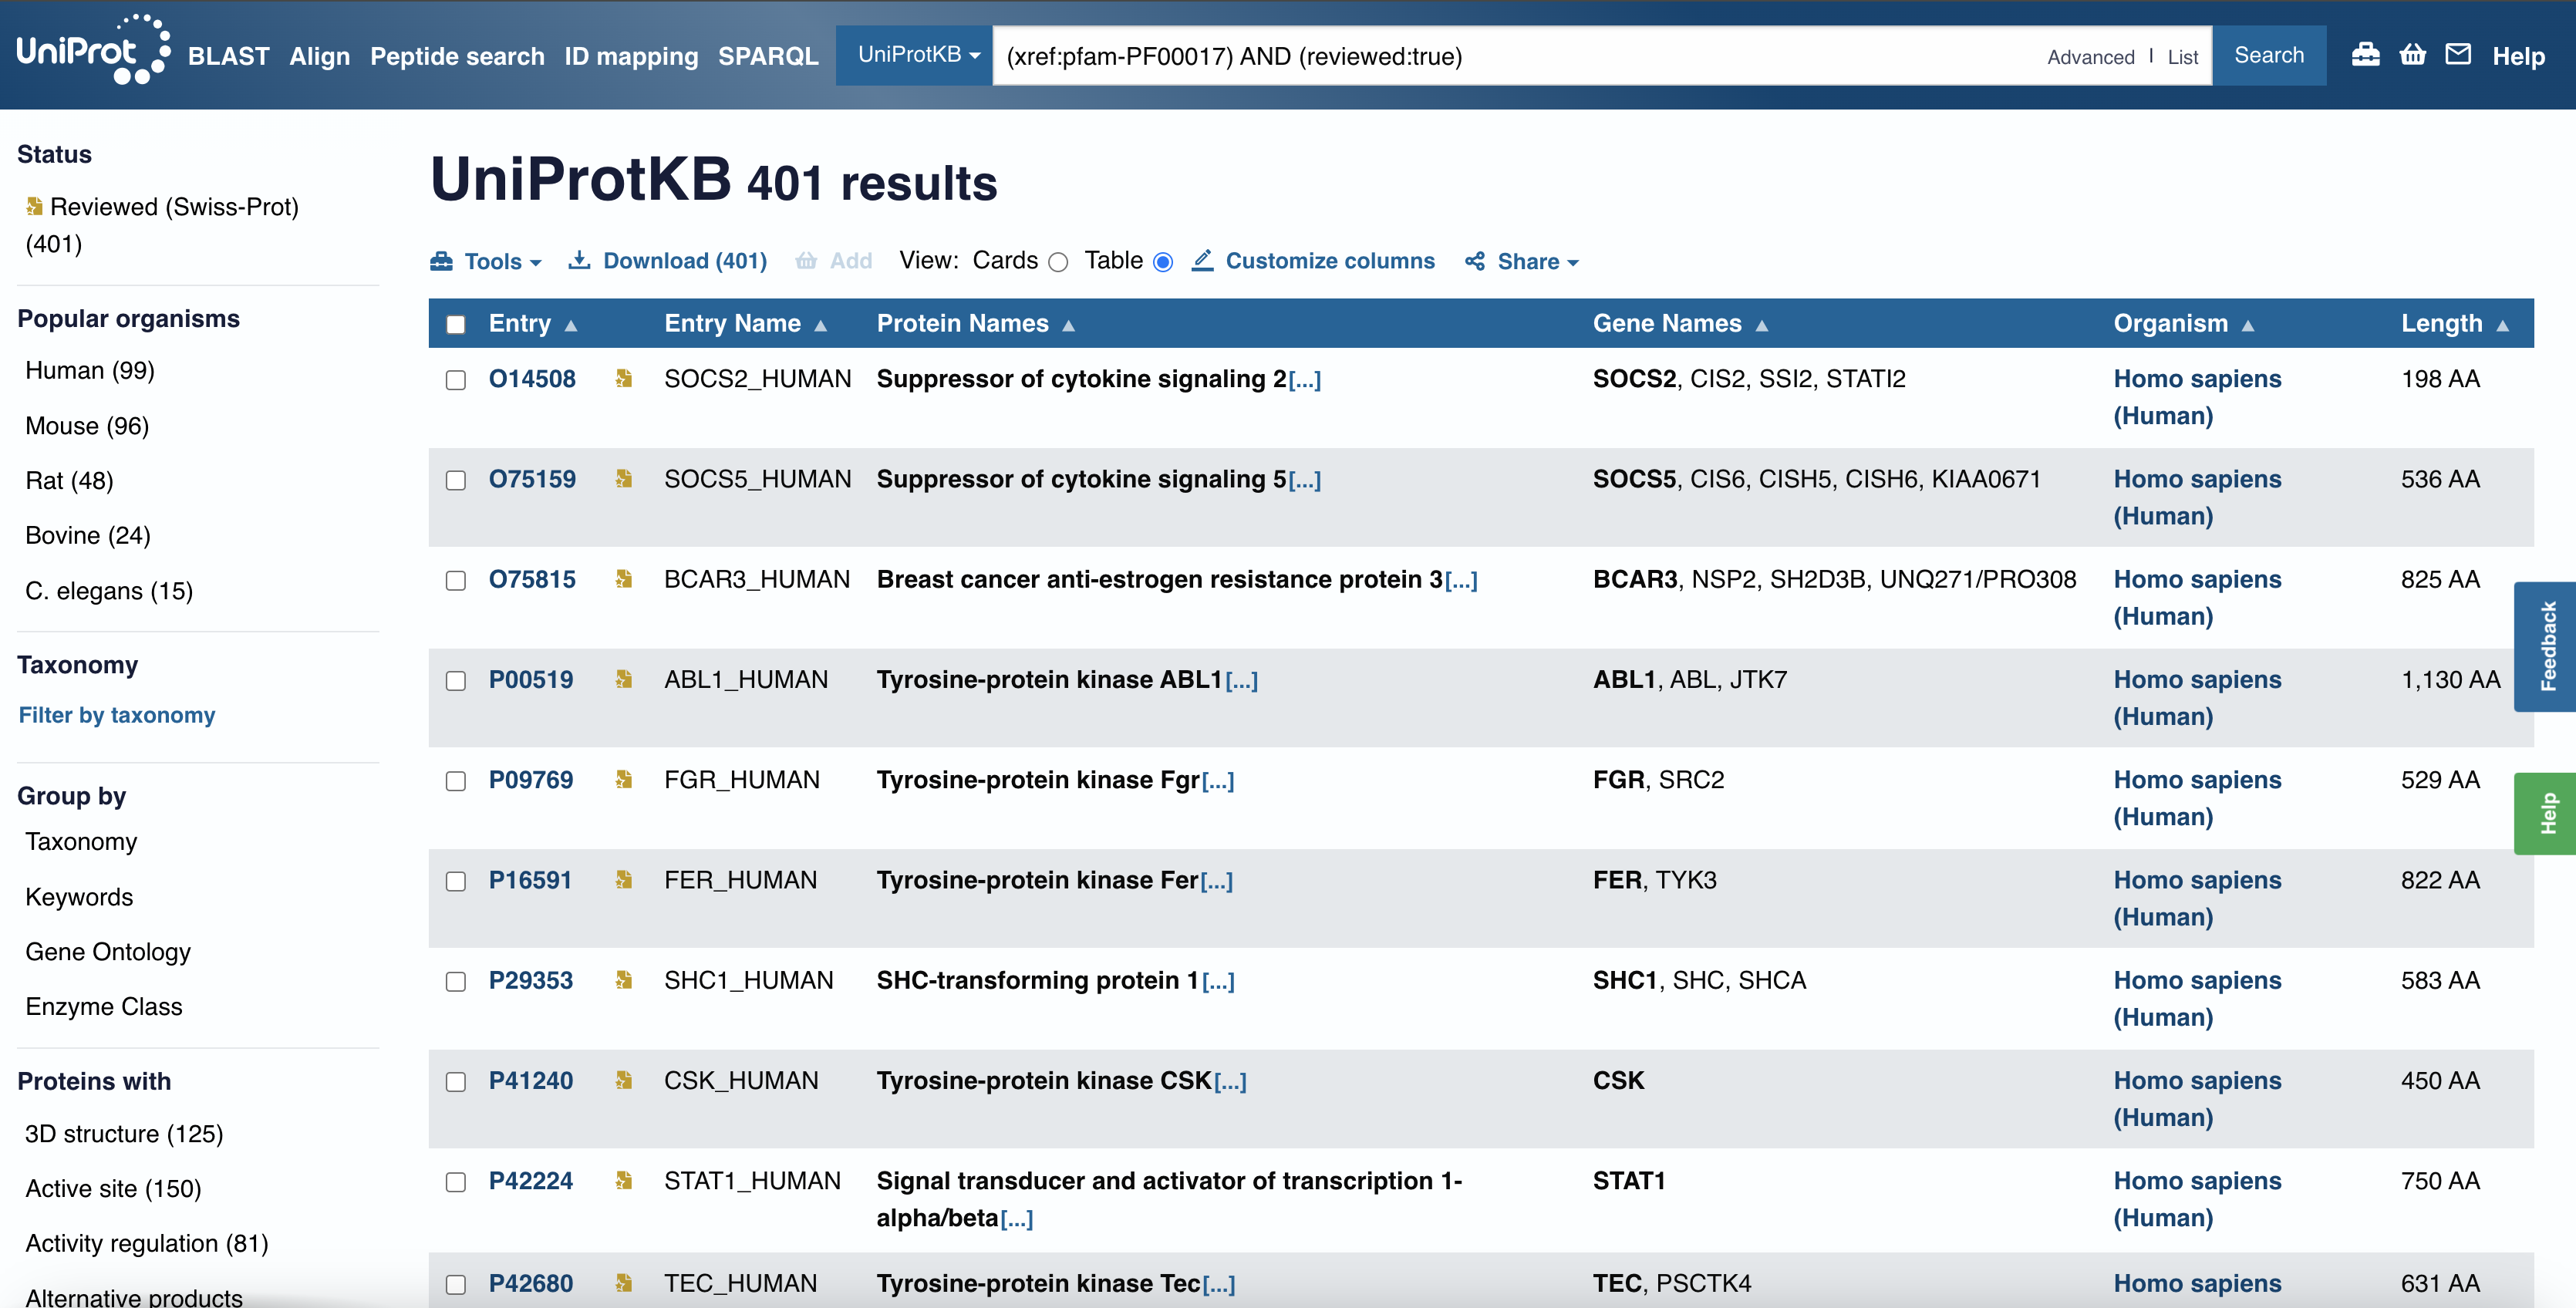

# Part 2

## Question 5 - Pairwise Sequence Alignment
Compare the sequences of your superfamily provided in the assignment file by performing an all-vs-all pairwise sequence alignment. 
Hint: You can use BioPython and the Align module. 

Assigned superfamily identifier:

>3.10.200.10
3ks3	A	4	261	MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK
5msa	A	3	263	MSKWTYFGPDGENSWSKKYPSCGGLLQSPIDLHSDILQYDASLTPLEFQGYNLSANKQFLLTNNGHSVKLNLPSDMHIQGLQSRYSATQLHLHWGNPNDPHGSEHTVSGQHFAAELHIVHYNSDLYPDASTASNKSEGLAVLAVLIEMGSFNPSYDKIFSHLQHVKYKGQEAFVPGFNIEELLPERTAEYYRYRGSLTTPPCNPTVLWTVFRNPVQISQEQLLALETALYCTHMDDPSPREMINNFRQVQKFDERLVYTSFSQ
3fw3	A	5	259	AESHWCYEVQAESSNYPCLVPVKWGGNCQKDRQSPINIVTTKAKVDKKLGRFFFSGYDKKQTWTVQNNGHSVMMLLENKASISGGGLPAPYQAKQLHLHWSDLPYKGSEHSLDGEHFAMEMHIVHEKEKGTSRNVKEAQDPEDEIAVLAFLVEAGTQVNEGFQPLVEALSNIPKPEMSTTMAESSLLDLLPKEEKLRHYFRYLGSLTTPTCDEKVVWTVFREPIQLHREQILAFSQKLYYDKEQTVSMKDNVRPLQQLGQRTVIKS
3jxg	A	58	320	GPGSGDPYWAYSGAYGPEHWVTSSVSCGGSHQSPIDILDHHARVGDEYQELQLDGFDNESSNKTWMKNTGKTVAILLKDDYFVSGAGLPGRFKAEKVEFHWGHSNGSAGSEHSVNGRRFPVEMQIFFYNPDDFDSFQTAISENRIIGAMAIFFQVSPRDNSALDPIIHGLKGVVHHEKETFLDPFILRDLLPASLGSYYRYTGSLTTPPCSEIVEWIVFRRPVPISYHQLEAFYSIFTTEQQDHVKSVEYLRNNFRPQQALNDRVVSKS
5ush	A	3	234	MPQQLSPINIETKKAISNARLKPLDIHYNESKPTTIQNTGKLVRINFKGGYISGGFLPNEYVLSSLHIYWGKEDDYGSNHLIDVYKYSGEINLVHWNKKKYSSYEEAKKHDDGLIIISIFLQVLDHKNVYFQKIVNQLDSIRSANTSAPFDSVFYLDNLLPSKLDYFTYLGTTINHSADAVWIIFPTPINIHSDQLSKFRTLLSLSNHEGKPHYITENYRNPYKLNDDTEVYYSGHHHHHH
2w2j	A	23	290	EEEGVEWGYEEGVEWGLVFPDANGEYQSPINLNSREARYDPSLLDVRLSPNYVVCRDCEVTNDGHTIQVILKSKSVLSGGPLPQGHEFELYEVRFHWGRENQRGSEHTVNFKAFPMELHLIHWNSTLFGSIDEAVGKPHGIAIIALFVQIGKEHVGLKAVTEILQDIQYKGKSKTIPCFNPNTLLPDPLLRDYWVYEGSLTIPPCSEGVTWILFRYPLTISQLQIEEFRRLRTHVKGAELVEGCDGILGDNFRPTQPLSDRVIRAAFQ
4xfw	A	22	247	KWDYKNKENGPHRWDKLHKDFEVCKSGKSQSPINIEHYYHTQDKADLQFKYAASKPKAVFFTHHTLKASFEPTNHINYRGHDYVLDNVHFHAPMEFLINNKTRPLSAHFVHKDAKGRLLVLAIGFEEGKENPNLDPILEGIQKKQNFKEVALDAFLPKSINYYHFNGSLTAPPCTEGVAWFVVEEPLEVSAKQLAEIKKRMKNSPNQRPVQPDYNTVIIKRSAETR
4coq	A	23	247	GAHWGYSGSIGPEHWGDLSPEYLMCKIGKNQSPIDINSADAVKACLAPVSVYYVSDAKYVVNNGHTIKVVMGGRGYVVVDGKRFYLKQFHFHAPSEHTVNGKHYPFEAHFVHLDKNGNITVLGVFFKVGKENPELEKVWRVMPEEPGQKRHLTARIDPEKLLPENRDYYRYSGSLTTPPCSEGVRWIVFKEPVEMSREQLEKFRKVMGFDNNRPVQPLNARKVMK
4twl	A	3	241	VEDEFSYIDGNPNGPENWGNLKPEWETCGKGMEQSPIQLRDNRVIFDQTLGKLRRNYRAVDARLRNSGHDVLVDFKGNAGSLSINRVEYQLKRIHFHSPSEHEMNGERFDLEAQLVHESQDQKRAVVSILFRFGRADPFLSDLEDFIKQFSNSQKNEINAGVVDPNQLQIDDSAYYRYMGSFTAPPCTEGISWTVMRKVATVSPRQVLLLKQAVNENAINNARPLQPTNFRSVFYFEQLKSKLGVI
3q31	A	35	270	AAGGLDDANKFNYTGLGGPLNWYGLDEANEACAKGKHQSPIVIDSAAIDYAASGSLKLDLPLADGSKLENLGFGLQVTLTNGSLTANSKTYTLAQFHFHTPSEHHVNEEHFPMEVHFVFQTAAKETAVVGFFFQLSEVGDSVPLFDSVFAPIDNIPDAGTSTTTGQLDFGGLLDHFNRHGVYQYTGSLTTPPCTEEVMWNLSTEPLPLTVQGYNKVKKIIKYNARYTQNALGQDNLLEVAAQKL

In [7]:
sequences = {
    "3ks3": Seq("MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK"),
    "5msa": Seq("MSKWTYFGPDGENSWSKKYPSCGGLLQSPIDLHSDILQYDASLTPLEFQGYNLSANKQFLLTNNGHSVKLNLPSDMHIQGLQSRYSATQLHLHWGNPNDPHGSEHTVSGQHFAAELHIVHYNSDLYPDASTASNKSEGLAVLAVLIEMGSFNPSYDKIFSHLQHVKYKGQEAFVPGFNIEELLPERTAEYYRYRGSLTTPPCNPTVLWTVFRNPVQISQEQLLALETALYCTHMDDPSPREMINNFRQVQKFDERLVYTSFSQ"),
    "3fw3": Seq("AESHWCYEVQAESSNYPCLVPVKWGGNCQKDRQSPINIVTTKAKVDKKLGRFFFSGYDKKQTWTVQNNGHSVMMLLENKASISGGGLPAPYQAKQLHLHWSDLPYKGSEHSLDGEHFAMEMHIVHEKEKGTSRNVKEAQDPEDEIAVLAFLVEAGTQVNEGFQPLVEALSNIPKPEMSTTMAESSLLDLLPKEEKLRHYFRYLGSLTTPTCDEKVVWTVFREPIQLHREQILAFSQKLYYDKEQTVSMKDNVRPLQQLGQRTVIKS"),
    "3jxg": Seq("GPGSGDPYWAYSGAYGPEHWVTSSVSCGGSHQSPIDILDHHARVGDEYQELQLDGFDNESSNKTWMKNTGKTVAILLKDDYFVSGAGLPGRFKAEKVEFHWGHSNGSAGSEHSVNGRRFPVEMQIFFYNPDDFDSFQTAISENRIIGAMAIFFQVSPRDNSALDPIIHGLKGVVHHEKETFLDPFILRDLLPASLGSYYRYTGSLTTPPCSEIVEWIVFRRPVPISYHQLEAFYSIFTTEQQDHVKSVEYLRNNFRPQQALNDRVVSKS"),
    "5ush": Seq("MPQQLSPINIETKKAISNARLKPLDIHYNESKPTTIQNTGKLVRINFKGGYISGGFLPNEYVLSSLHIYWGKEDDYGSNHLIDVYKYSGEINLVHWNKKKYSSYEEAKKHDDGLIIISIFLQVLDHKNVYFQKIVNQLDSIRSANTSAPFDSVFYLDNLLPSKLDYFTYLGTTINHSADAVWIIFPTPINIHSDQLSKFRTLLSLSNHEGKPHYITENYRNPYKLNDDTEVYYSGHHHHHH"),
    "2w2j": Seq("EEEGVEWGYEEGVEWGLVFPDANGEYQSPINLNSREARYDPSLLDVRLSPNYVVCRDCEVTNDGHTIQVILKSKSVLSGGPLPQGHEFELYEVRFHWGRENQRGSEHTVNFKAFPMELHLIHWNSTLFGSIDEAVGKPHGIAIIALFVQIGKEHVGLKAVTEILQDIQYKGKSKTIPCFNPNTLLPDPLLRDYWVYEGSLTIPPCSEGVTWILFRYPLTISQLQIEEFRRLRTHVKGAELVEGCDGILGDNFRPTQPLSDRVIRAAFQ"),
    "4xfw": Seq("KWDYKNKENGPHRWDKLHKDFEVCKSGKSQSPINIEHYYHTQDKADLQFKYAASKPKAVFFTHHTLKASFEPTNHINYRGHDYVLDNVHFHAPMEFLINNKTRPLSAHFVHKDAKGRLLVLAIGFEEGKENPNLDPILEGIQKKQNFKEVALDAFLPKSINYYHFNGSLTAPPCTEGVAWFVVEEPLEVSAKQLAEIKKRMKNSPNQRPVQPDYNTVIIKRSAETR"),
    "4coq": Seq("GAHWGYSGSIGPEHWGDLSPEYLMCKIGKNQSPIDINSADAVKACLAPVSVYYVSDAKYVVNNGHTIKVVMGGRGYVVVDGKRFYLKQFHFHAPSEHTVNGKHYPFEAHFVHLDKNGNITVLGVFFKVGKENPELEKVWRVMPEEPGQKRHLTARIDPEKLLPENRDYYRYSGSLTTPPCSEGVRWIVFKEPVEMSREQLEKFRKVMGFDNNRPVQPLNARKVMK"),
    "4twl": Seq("VEDEFSYIDGNPNGPENWGNLKPEWETCGKGMEQSPIQLRDNRVIFDQTLGKLRRNYRAVDARLRNSGHDVLVDFKGNAGSLSINRVEYQLKRIHFHSPSEHEMNGERFDLEAQLVHESQDQKRAVVSILFRFGRADPFLSDLEDFIKQFSNSQKNEINAGVVDPNQLQIDDSAYYRYMGSFTAPPCTEGISWTVMRKVATVSPRQVLLLKQAVNENAINNARPLQPTNFRSVFYFEQLKSKLGVI"),
    "3q31": Seq("AAGGLDDANKFNYTGLGGPLNWYGLDEANEACAKGKHQSPIVIDSAAIDYAASGSLKLDLPLADGSKLENLGFGLQVTLTNGSLTANSKTYTLAQFHFHTPSEHHVNEEHFPMEVHFVFQTAAKETAVVGFFFQLSEVGDSVPLFDSVFAPIDNIPDAGTSTTTGQLDFGGLLDHFNRHGVYQYTGSLTTPPCTEEVMWNLSTEPLPLTVQGYNKVKKIIKYNARYTQNALGQDNLLEVAAQKL")
}

In [8]:
nw_identity_matrix = np.zeros((len(sequences), len(sequences)))

seq_ids = list(sequences.keys())

# Pairwise alignments
for i, id1 in enumerate(seq_ids):
    for j, id2 in enumerate(seq_ids):
        if i <= j:
            seq1 = sequences[id1]
            seq2 = sequences[id2]
            
            # Needleman-Wunsch (global alignment)
            nw_alignment = pairwise2.align.globalds(seq1, seq2, blosum62, -10, -0.5)
            nw_identity = sum(res1 == res2 for res1, res2 in zip(nw_alignment[0][0], nw_alignment[0][1]))
            nw_identity_matrix[i, j] = nw_identity_matrix[j, i] = nw_identity / max(len(seq1), len(seq2)) * 100

nw_df = pd.DataFrame(nw_identity_matrix, index=seq_ids, columns=seq_ids)

print("Needleman-Wunsch Identity Matrix (in %):")
print(nw_df)

Needleman-Wunsch Identity Matrix (in %):
            3ks3        5msa        3fw3        3jxg        5ush        2w2j  \
3ks3  100.000000   36.501901   35.714286   29.368030   33.846154   41.044776   
5msa   36.501901  100.000000   36.842105   34.944238   25.475285   32.089552   
3fw3   35.714286   36.842105  100.000000   31.970260   26.315789   31.343284   
3jxg   29.368030   34.944238   31.970260  100.000000   24.163569   34.572491   
5ush   33.846154   25.475285   26.315789   24.163569  100.000000   26.492537   
2w2j   41.044776   32.089552   31.343284   34.572491   26.492537  100.000000   
4xfw   30.000000   24.334601   25.563910   27.137546   22.821577   25.746269   
4coq   40.000000   32.319392   30.075188   33.457249   24.066390   33.208955   
4twl   31.153846   28.136882   27.067669   27.137546   21.138211   26.492537   
3q31   29.230769   25.855513   32.330827   28.624535   18.442623   26.492537   

            4xfw        4coq        4twl        3q31  
3ks3   30.000000   40.0

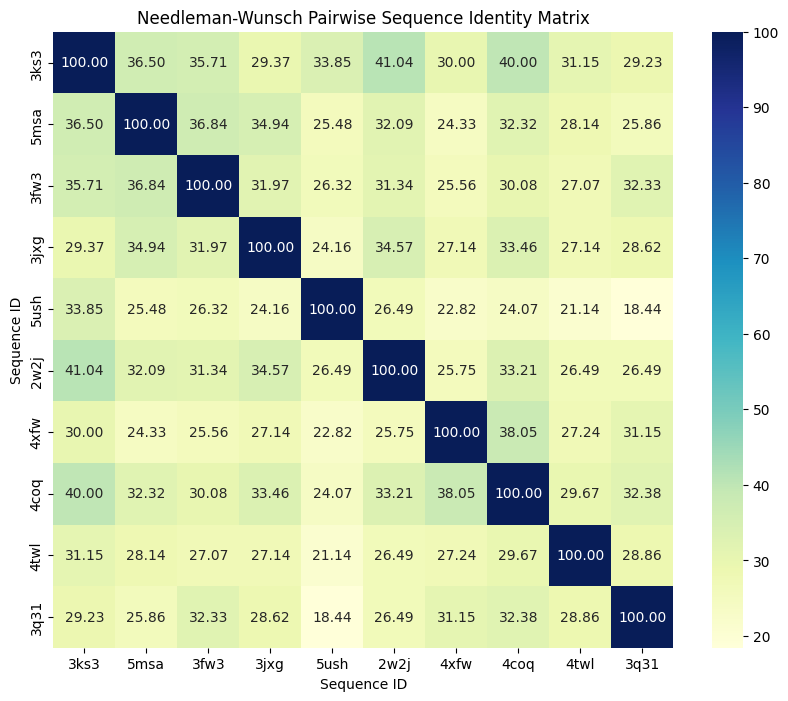

In [9]:
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(nw_df, annot=True, cmap="YlGnBu", fmt=".2f")

# Labels and title
plt.title("Needleman-Wunsch Pairwise Sequence Identity Matrix")
plt.xlabel("Sequence ID")
plt.ylabel("Sequence ID")
plt.show()

In [10]:
curr_best_avg_score = 0
curr_best_seq = None

for id, scores in nw_df.iterrows():
    curr_avg_score = (scores.sum() - 100) / (len(scores) - 1)
    if curr_avg_score > curr_best_avg_score:
        curr_best_avg_score = curr_avg_score
        curr_best_seq = id

print("The sequence {} is the most similar to all other sequences with an average score of {}".format(curr_best_seq, np.round(curr_best_avg_score, 2)))

The sequence 3ks3 is the most similar to all other sequences with an average score of 34.1


1.	Paste below a 10 x 10 matrix where cells represent the pairwise sequence identity. Provide sequence identifiers in the matrix tick labels.

    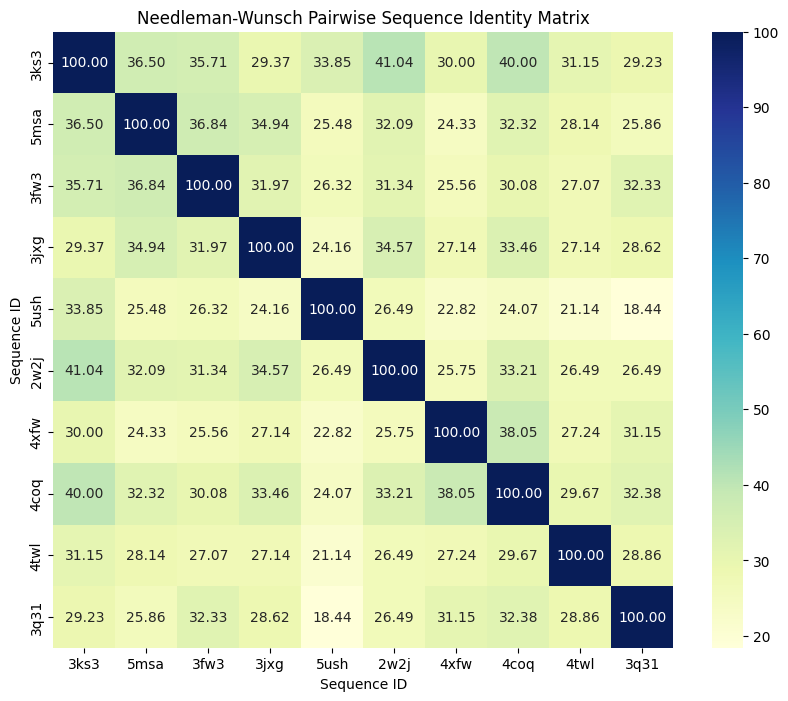

2.	Which sequence is the most similar to all other sequences? 

    Based on the identity matrix values, the sequence 3ks3 is most similar to all other sequences with an average score of 34.09%.

3.	Based on sequence identity values, are there sequences that can be grouped in the same (sub)family?
    We can group the sequences in two different sub families by looking to an identity score greater than 30% between the sequences:
    - **First family:** `2w2j, 4coq, 3ks3`
    - **Second family:** `5msa, 3fw3`


## Question 6 - Multiple Sequence Alignment (MSA)

Create a multiple sequence alignment (MSA) starting from the domain sequences available in the assignment file using EBI ClustalOmega.

![Screenshot 2024-11-11 at 17.41.17.png](<attachment:Screenshot 2024-11-11 at 17.41.17.png>)

1.	Which columns are the most conserved when looking at the amino acid composition?
    
    ```
    Most conserved columns by amino acid composition (excluding gaps):
    Position: 13, Amino Acid: Y, Frequency: 100.00%, Non-gap Coverage: 90.00%
    Position: 42, Amino Acid: S, Frequency: 100.00%, Non-gap Coverage: 100.00%
    Position: 43, Amino Acid: P, Frequency: 100.00%, Non-gap Coverage: 100.00%
    Position: 98, Amino Acid: G, Frequency: 100.00%, Non-gap Coverage: 50.00%
    Position: 101, Amino Acid: L, Frequency: 100.00%, Non-gap Coverage: 60.00%
    ```
    
2.	Which columns are the most conserved when looking at the column entropy?
    
    ```
    Most conserved columns by entropy (excluding gaps):
    Position: 13, Entropy: 0.000, Non-gap Coverage: 90.00%
    Position: 42, Entropy: 0.000, Non-gap Coverage: 100.00%
    Position: 43, Entropy: 0.000, Non-gap Coverage: 100.00%
    Position: 98, Entropy: 0.000, Non-gap Coverage: 50.00%
    Position: 101, Entropy: 0.000, Non-gap Coverage: 60.00%
    ```
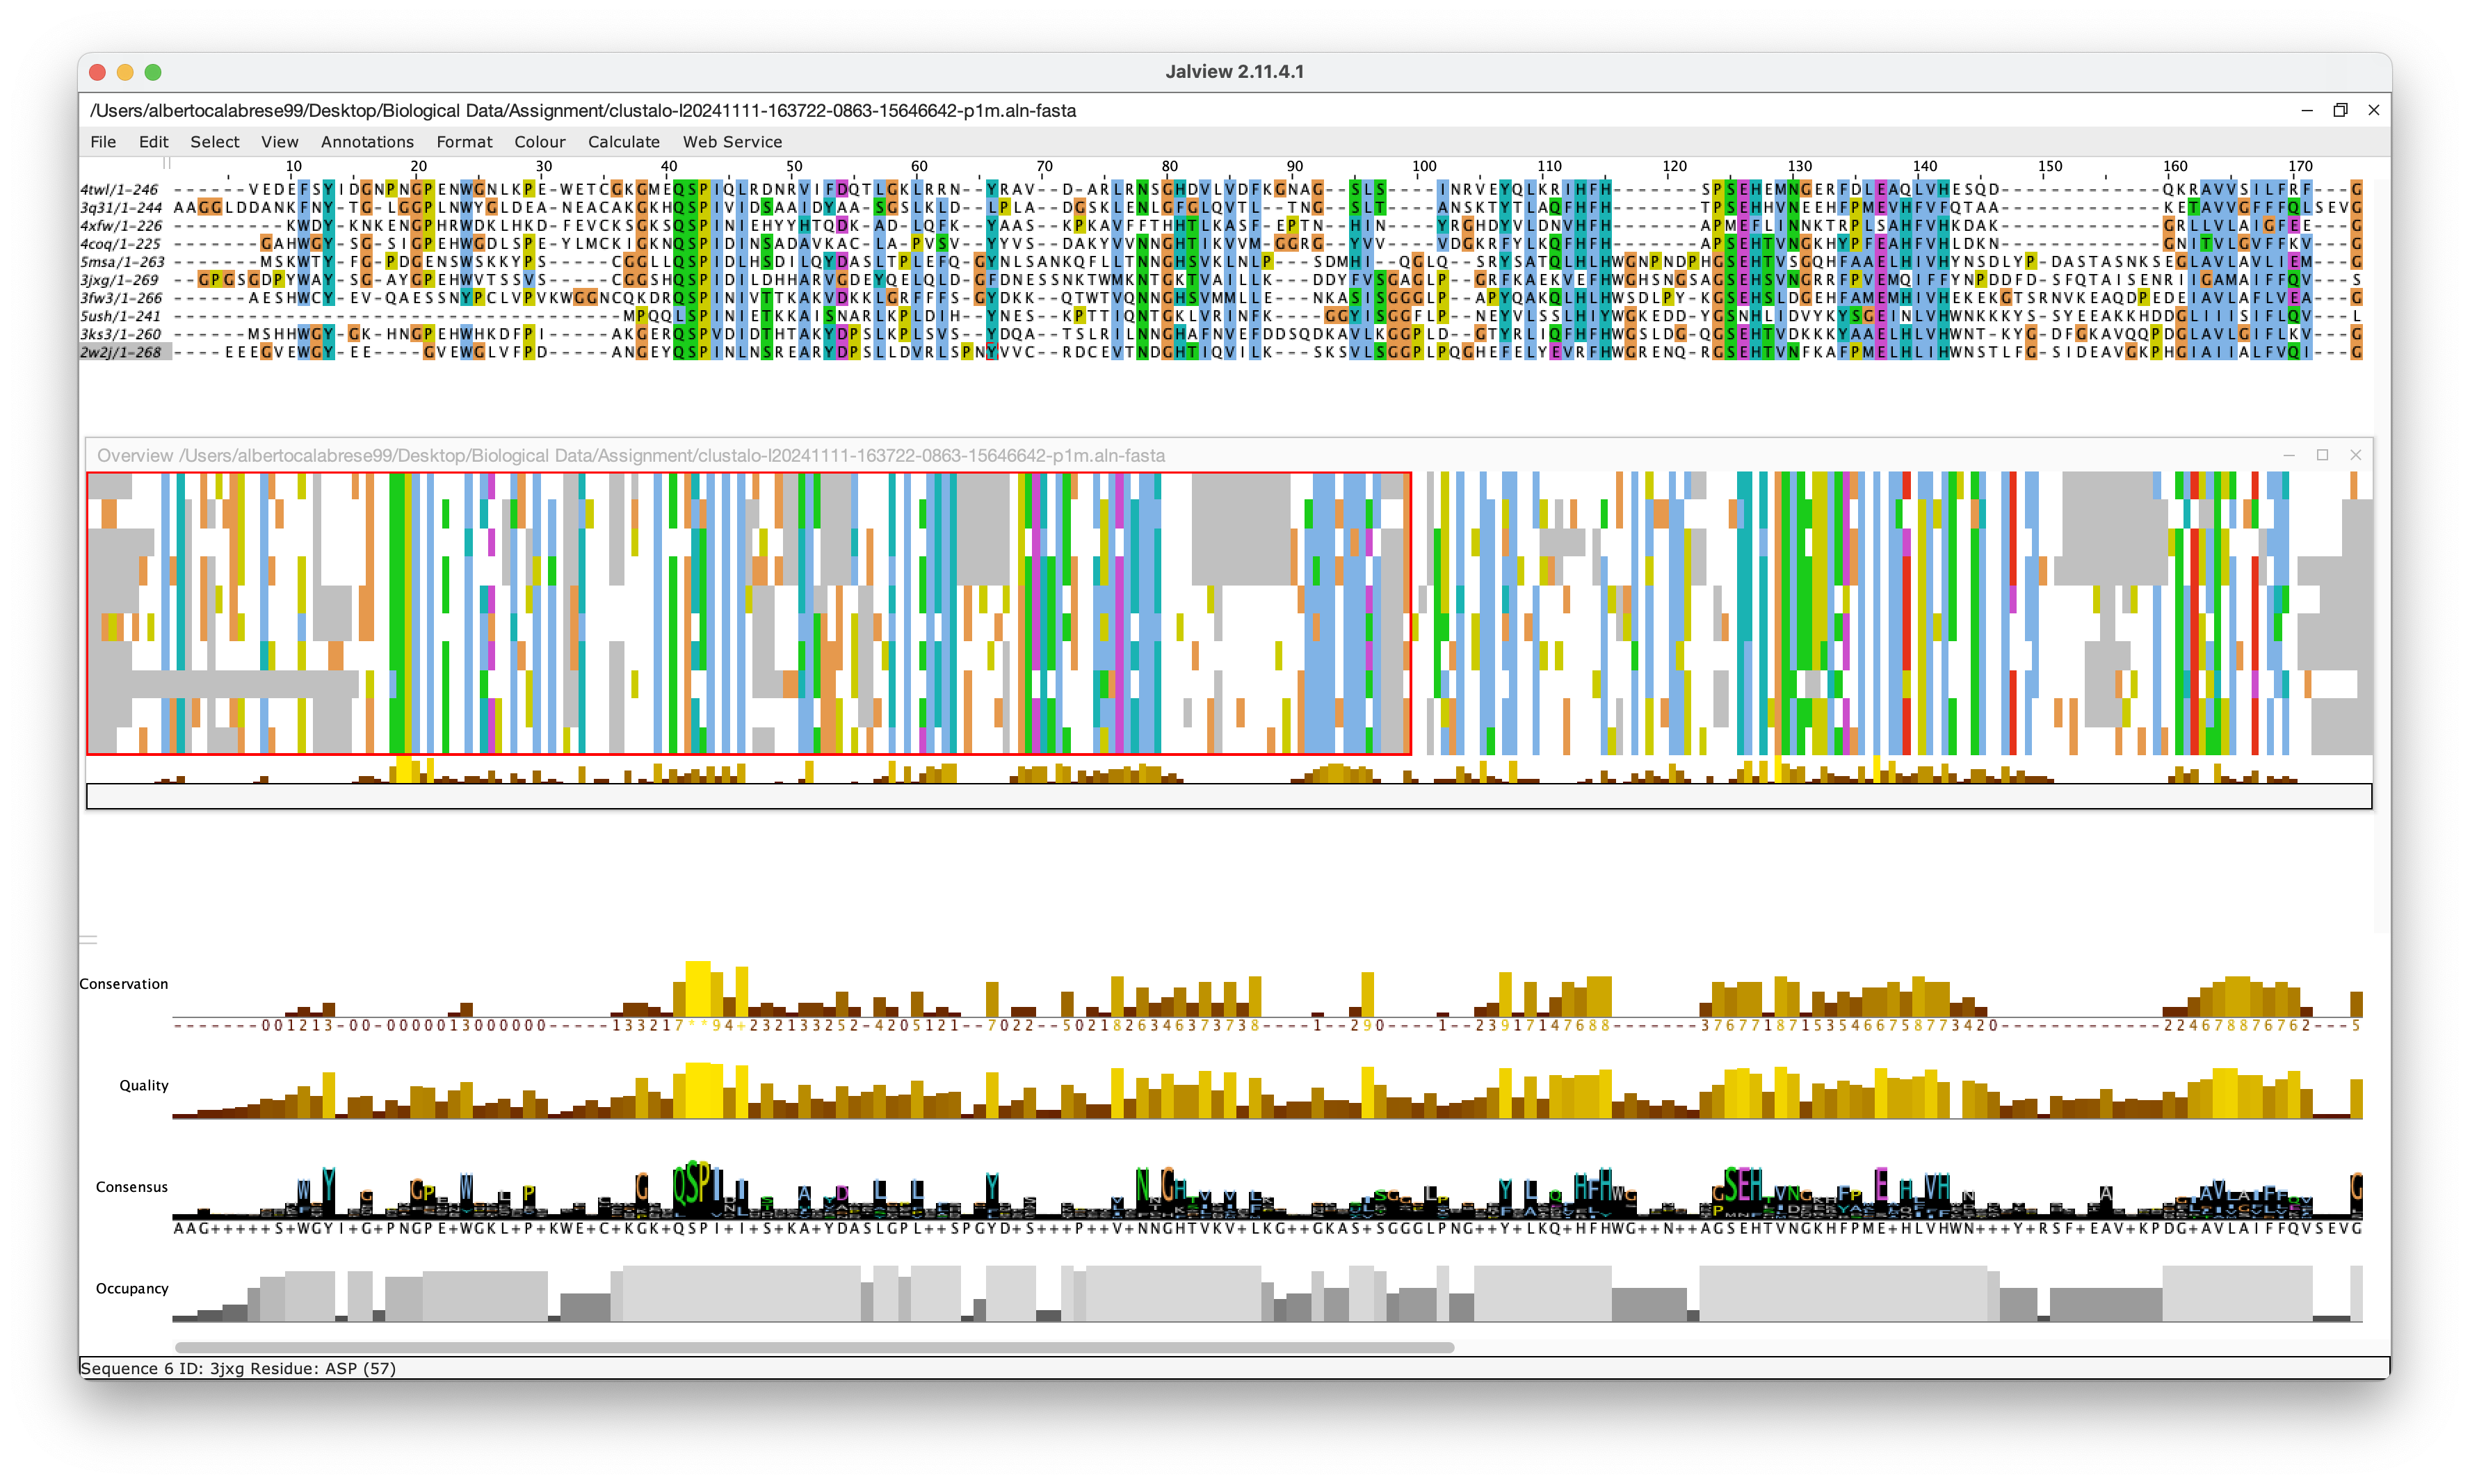

In [11]:
# Create the FASTA file
with open('sequences.fasta', 'w') as f:
    for id, seq in sequences.items():
        f.write(f'>{id}\n')
        f.write(f'{seq}\n')

In [12]:
def calculate_entropy(column):
    """Calculate entropy of a column in the MSA, ignoring gaps."""
    counts = Counter(column)
    total = sum(counts.values())
    entropy = 0.0
    for count in counts.values():
        frequency = count / total
        entropy -= frequency * np.log2(frequency)
    return entropy

def get_conserved_columns_by_amino_acid(msa_file, min_non_gap=0.5):
    """Identify most conserved columns based on amino acid composition."""
    alignment = AlignIO.read(msa_file, "fasta")
    num_sequences = len(alignment)
    conserved_columns = []

    for col_idx in range(alignment.get_alignment_length()):
        column = [record.seq[col_idx] for record in alignment]
        non_gap_count = sum(1 for aa in column if aa != '-')
        non_gap_coverage = non_gap_count / num_sequences
        
        if non_gap_coverage >= min_non_gap:
            aa_counts = Counter(aa for aa in column if aa != '-')
            most_common_aa, freq = aa_counts.most_common(1)[0]
            conserved_columns.append({
                "Position": col_idx + 1,
                "Amino Acid": most_common_aa,
                "Frequency": freq / non_gap_count * 100,
                "Non-gap Coverage": non_gap_coverage * 100
            })

    conserved_columns = sorted(conserved_columns, key=lambda x: -x["Frequency"])
    return conserved_columns[:5]

def get_conserved_columns_by_entropy(msa_file, min_non_gap=0.5):
    """Identify most conserved columns based on entropy."""
    alignment = AlignIO.read(msa_file, "fasta")
    num_sequences = len(alignment)
    entropy_columns = []

    for col_idx in range(alignment.get_alignment_length()):
        column = [record.seq[col_idx] for record in alignment]
        non_gap_count = sum(1 for aa in column if aa != '-')
        non_gap_coverage = non_gap_count / num_sequences

        if non_gap_coverage >= min_non_gap:
            entropy = calculate_entropy([aa for aa in column if aa != '-'])
            entropy_columns.append({
                "Position": col_idx + 1,
                "Entropy": entropy,
                "Non-gap Coverage": non_gap_coverage * 100
            })

    entropy_columns = sorted(entropy_columns, key=lambda x: x["Entropy"])
    return entropy_columns[:5]

In [13]:
msa_file = "clustalo-I20241111-163722-0863-15646642-p1m.fasta"

conserved_by_aa = get_conserved_columns_by_amino_acid(msa_file)
print("Most conserved columns by amino acid composition (excluding gaps):")
for column in conserved_by_aa:
    print(f"Position: {column['Position']}, Amino Acid: {column['Amino Acid']}, "
          f"Frequency: {column['Frequency']:.2f}%, Non-gap Coverage: {column['Non-gap Coverage']:.2f}%")

conserved_by_entropy = get_conserved_columns_by_entropy(msa_file)
print("\nMost conserved columns by entropy (excluding gaps):")
for column in conserved_by_entropy:
    print(f"Position: {column['Position']}, Entropy: {float(column['Entropy']):.3f}, "
          f"Non-gap Coverage: {column['Non-gap Coverage']:.2f}%")

Most conserved columns by amino acid composition (excluding gaps):
Position: 13, Amino Acid: Y, Frequency: 100.00%, Non-gap Coverage: 90.00%
Position: 42, Amino Acid: S, Frequency: 100.00%, Non-gap Coverage: 100.00%
Position: 43, Amino Acid: P, Frequency: 100.00%, Non-gap Coverage: 100.00%
Position: 98, Amino Acid: G, Frequency: 100.00%, Non-gap Coverage: 50.00%
Position: 101, Amino Acid: L, Frequency: 100.00%, Non-gap Coverage: 60.00%

Most conserved columns by entropy (excluding gaps):
Position: 13, Entropy: 0.000, Non-gap Coverage: 90.00%
Position: 42, Entropy: 0.000, Non-gap Coverage: 100.00%
Position: 43, Entropy: 0.000, Non-gap Coverage: 100.00%
Position: 98, Entropy: 0.000, Non-gap Coverage: 50.00%
Position: 101, Entropy: 0.000, Non-gap Coverage: 60.00%


## Question 7 - PSI-BLAST | HMMER 

Use the MSA generated before to perform a PSI-BLAST and an HMMER search against human proteins (or SwissProt if the search against human returns nothing).
Hint: For the PSI-BLAST search, you can use the NCBI web service and provide a PSSM generated with the PSI-BLAST command line. For HMMSEARCH you can provide directly the MSA.

![Screenshot 2024-11-12 at 13.27.02.png](<attachment:Screenshot 2024-11-12 at 13.27.02.png>)

![Screenshot 2024-11-12 at 13.29.27.png](<attachment:Screenshot 2024-11-12 at 13.29.27.png>)


``` bash
ncbi-blast-2.16.0+/bin/psiblast -subject Assignment/clustalo-I20241111-163722-0863-15646642-p1m.fasta -in_msa Assignment/clustalo-I20241111-163722-0863-15646642-p1m.fasta -out_ascii_pssm Assignment/clustalo-I20241111-163722-0863-15646642-p1m.pssm_ascii -out_pssm Assignment/clustalo-I20241111-163722-0863-15646642-p1m.pssm
```

![Screenshot 2024-11-12 at 22.47.40.png](<attachment:Screenshot 2024-11-12 at 22.47.40.png>)


1.	How many significant hits are returned by the two methods?

    - **PSI-BLAST:** 54
    - **HMMSEARCH:** 53
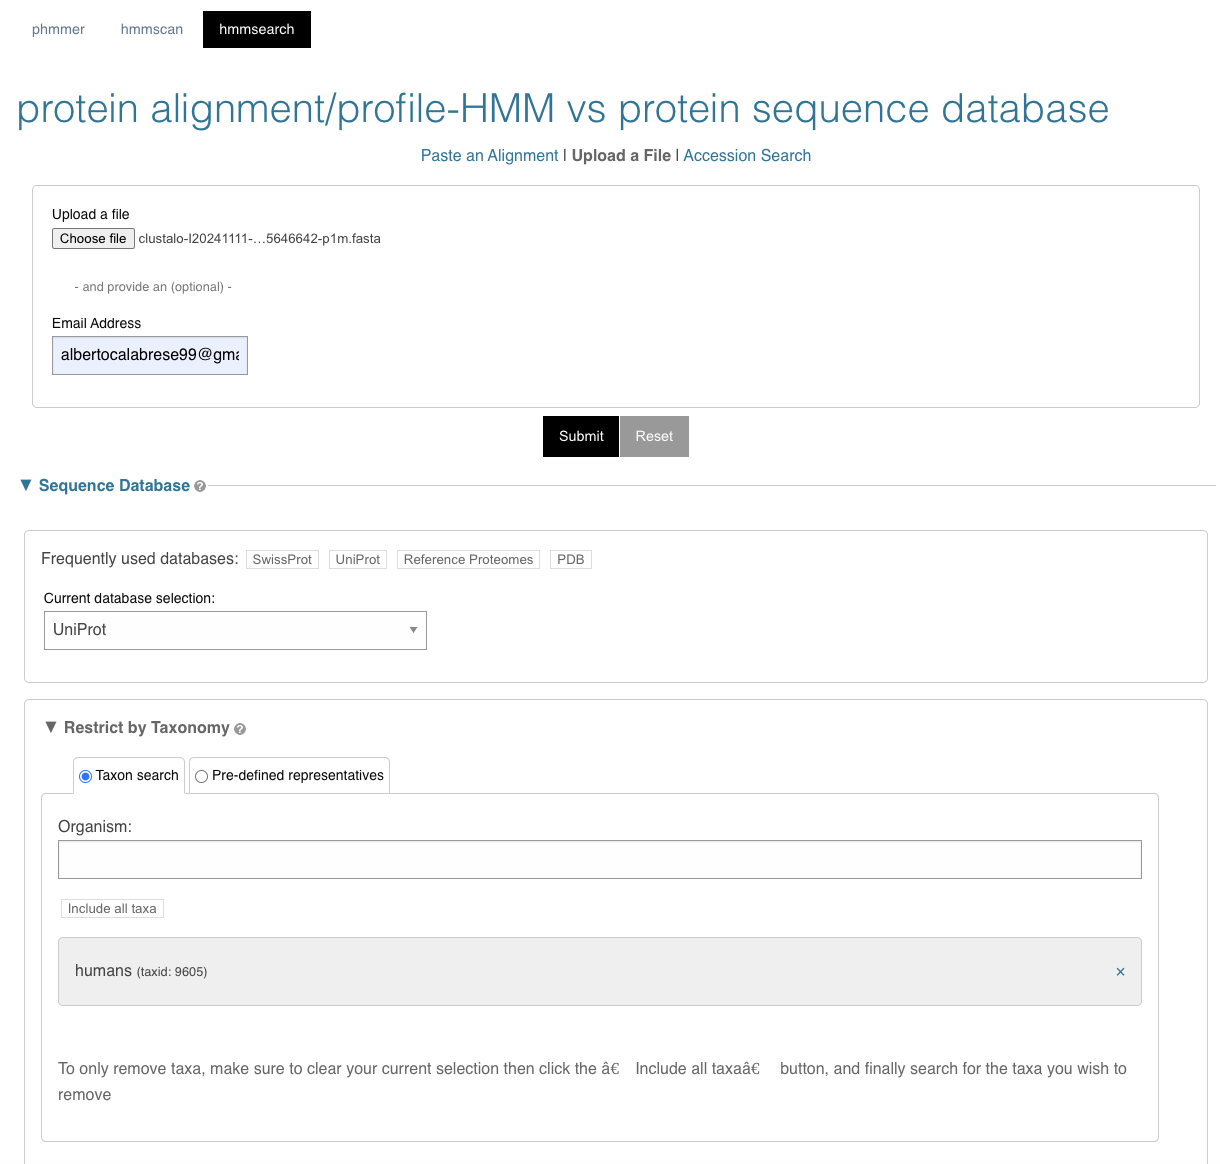
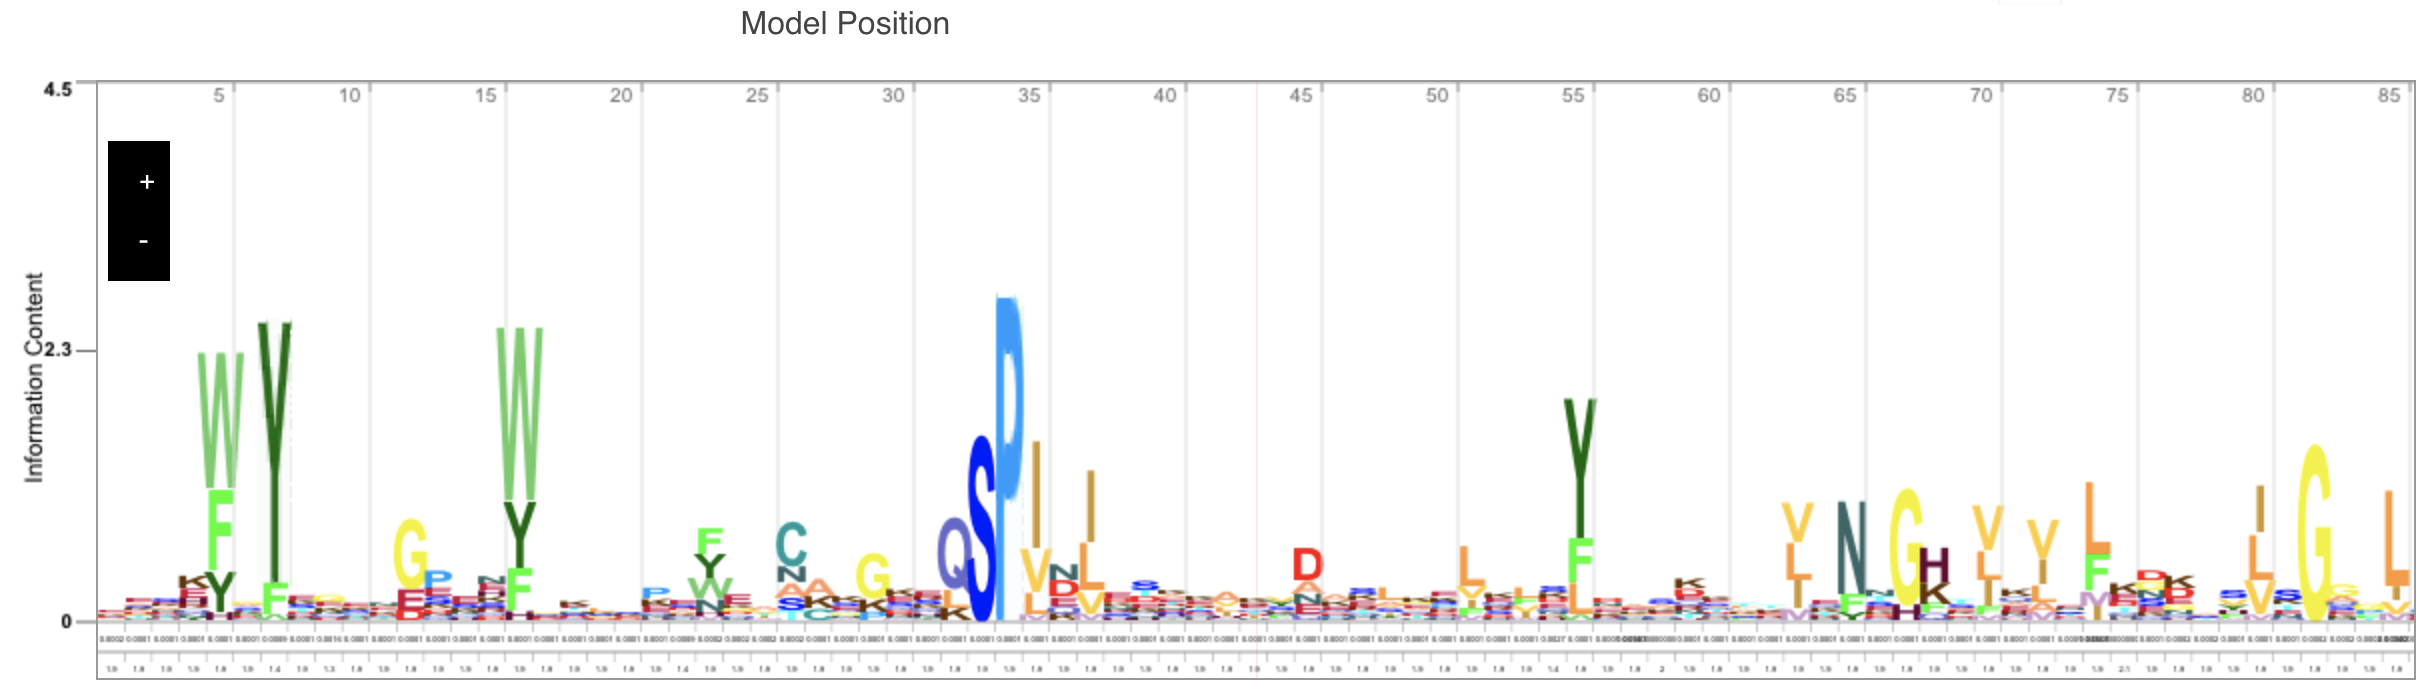
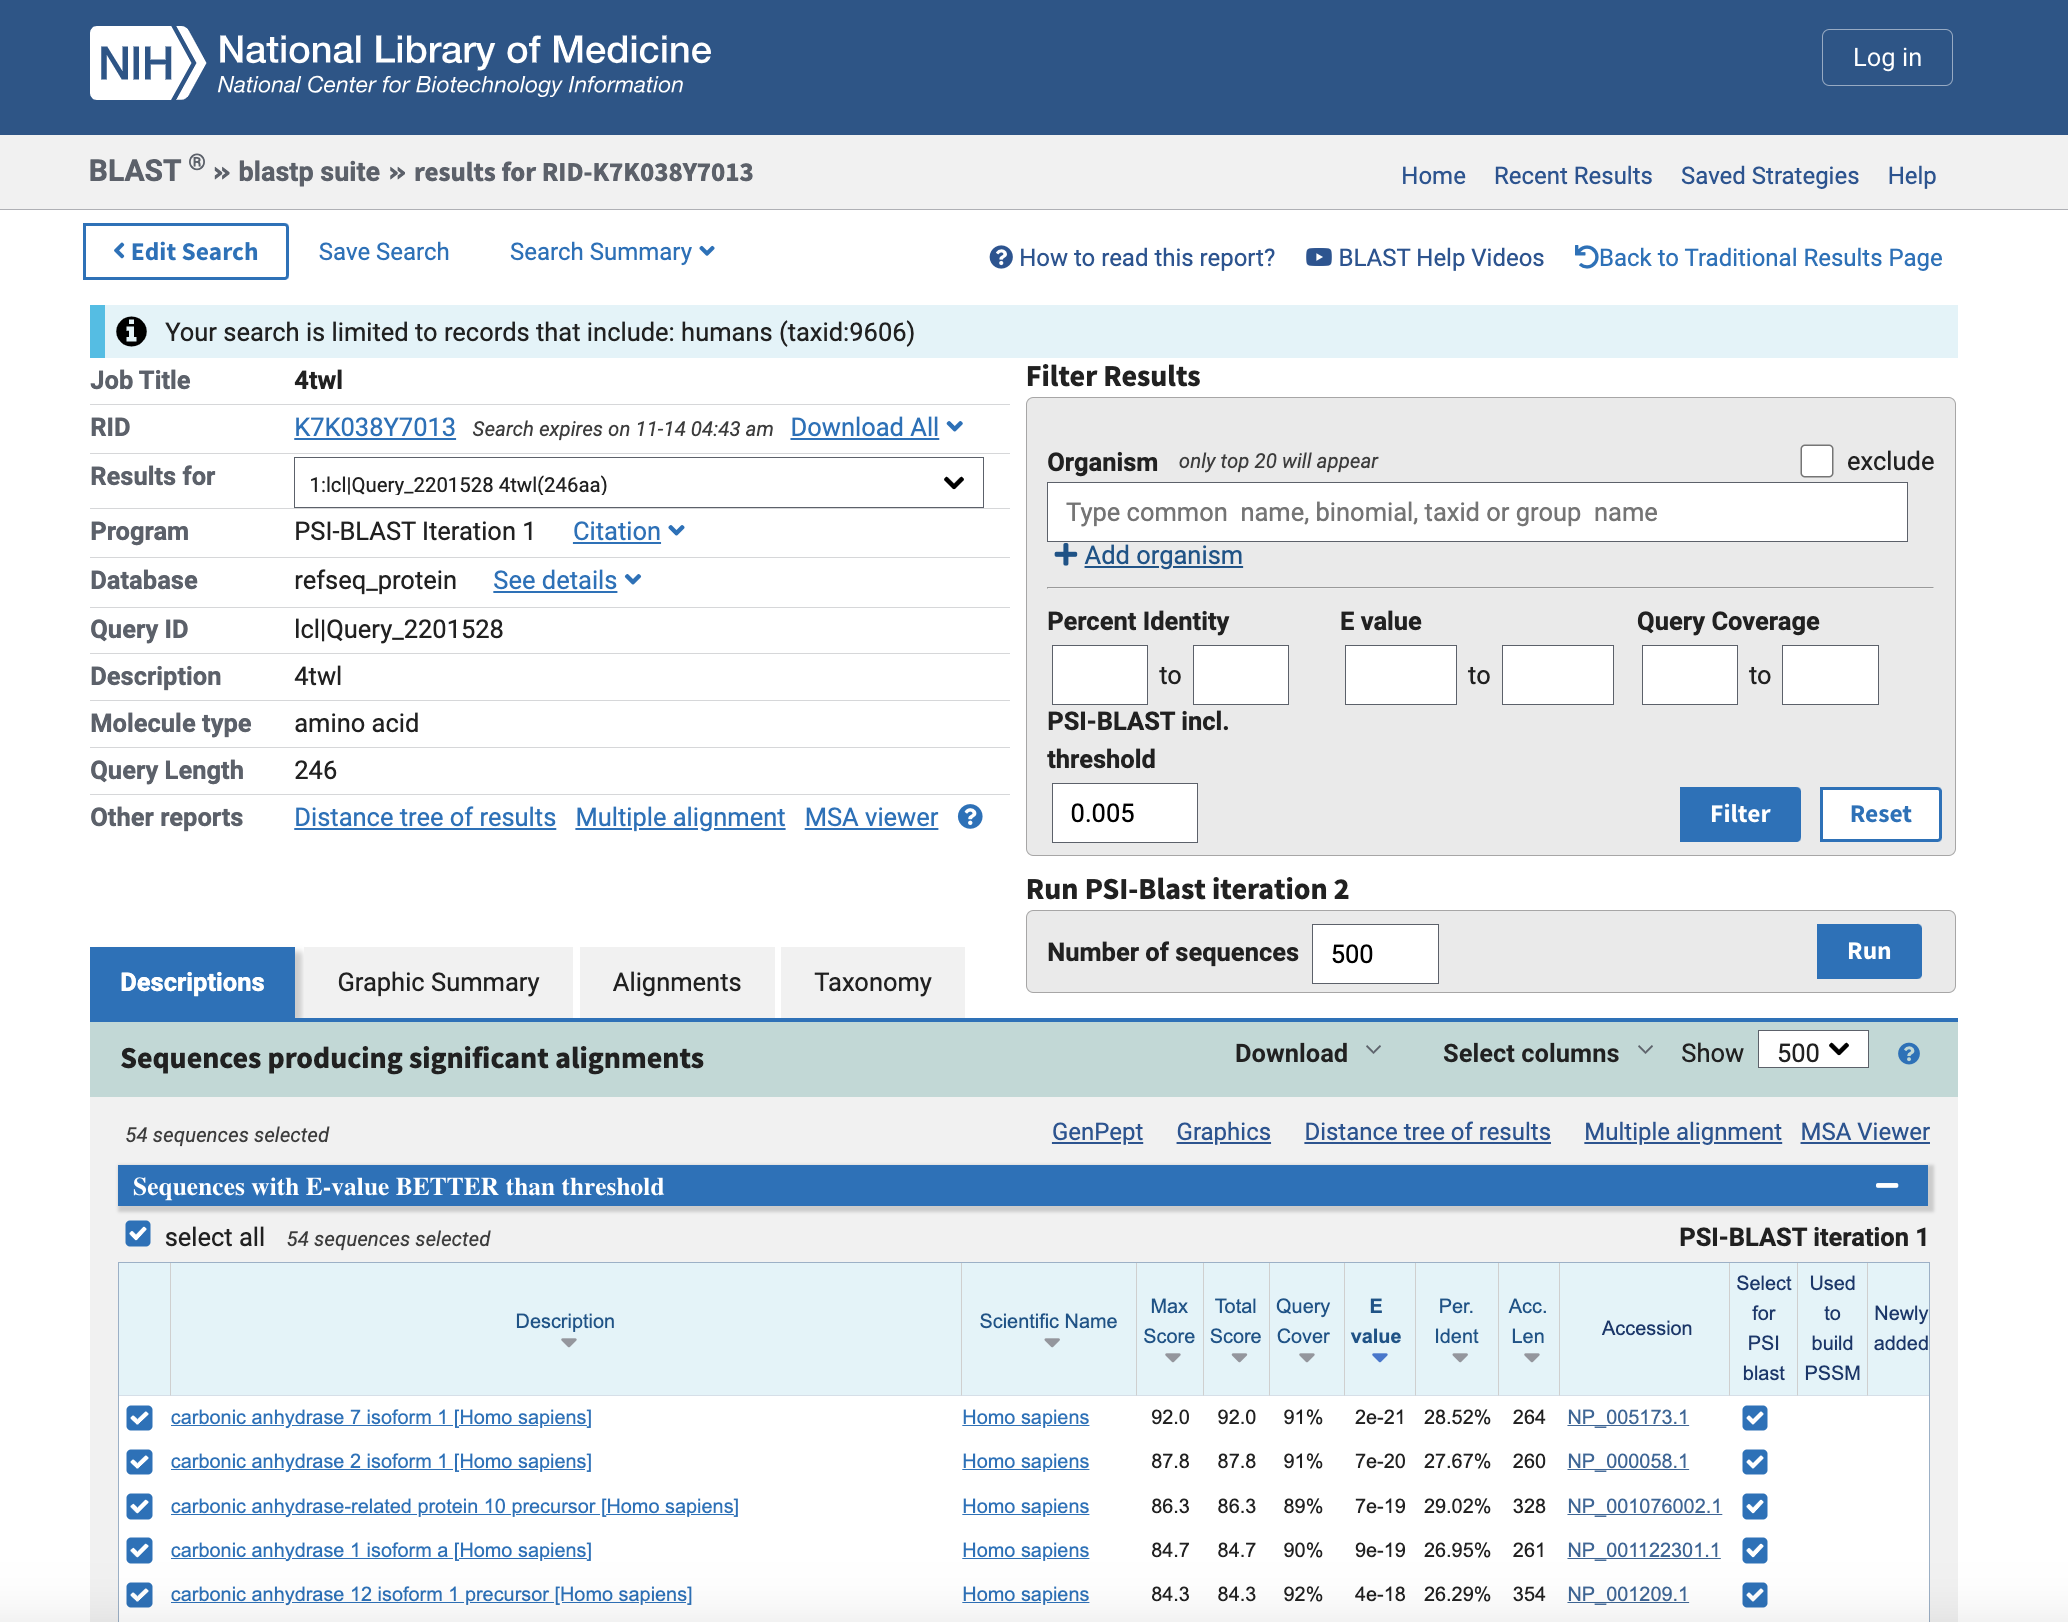